# **Deep Learning Project - Binary Classification**

---
## Table of Contents
1. [Introduction](#introduction)
2. [Imports](#Imports)  
3. [Load and prepare images](#load-and-prepare-images)
4. [Model Experimentation and Tuning](#model-experimentation-and-tuning)
    - [Data Augmentation](#data-augmentation)
    - [Pre-trained models](#pre-trained-models)
    - [Undersampling](#undersampling)
5. [Evaluation of best 2 models](#evaluation-of-best-2-models)   
----

# Introduction

This notebook focuses on the binary classification problem. We begin by loading and preparing the images, ensuring the data is correctly preprocessed for modeling. Next, we conduct model experimentation and tuning, where we explore the use of pre-trained models and undersampling techniques to address class imbalance in the dataset. Finally, we evaluate the two best models from our experiments.

# Imports

In [8]:
from functions import *

<module 'functions' from 'c:\\Users\\User\\Desktop\\Vasco\\DeepLearning\\functions.py'>

# Load and prepare images

In [9]:
# Load the cleaned dataset 
df_clean = pd.read_csv('df_clean.csv')

In [ ]:
# Extract image paths and labels
image_paths = df_clean['path_to_image'].values  
labels_binary = df_clean['Benign or Malignant'].values

We are splitting the data, which is already stored in the CSV file, so that we can import the images with the data pre-separated. The dataset is split twice: first, to create a training and testing set, and second, to further split the training set into training and validation sets.

In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_binary, y_test_binary = train_test_split(
    image_paths, labels_binary, test_size=0.2, stratify=labels_binary, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train_binary, y_val_binary = train_test_split(
    X_train, y_train_binary, test_size=0.2, stratify=y_train_binary, random_state=42)

In [12]:
# Print the number of samples in each array (Training, Validation, and Test)
print(f"Training samples: {len(X_train)}")  
print(f"Validation samples: {len(X_val)}")  
print(f"Test samples: {len(X_test)}") 

Training samples: 5061
Validation samples: 1266
Test samples: 1582


In [13]:
# Check if the labels are imbalanced
print("\n Training label distribution:\n", pd.Series(y_train_binary).value_counts())
print("\n Validation label distribution:\n", pd.Series(y_val_binary).value_counts())
print("\n Test label distribution:\n", pd.Series(y_test_binary).value_counts())


 Training label distribution:
 Malignant    3474
Benign       1587
Name: count, dtype: int64

 Validation label distribution:
 Malignant    869
Benign       397
Name: count, dtype: int64

 Test label distribution:
 Malignant    1086
Benign        496
Name: count, dtype: int64


Given the class distribution across the training, validation, and test sets, we observe an imbalance between the malignant and benign classes, with a higher number of malignant samples. To account for this imbalance, we will use the F1 score as our evaluation metric on the test set. The F1 score is particularly useful in situations with class imbalance because it considers both precision and recall, providing a more balanced measure of model performance, especially for the minority class (benign). This ensures that both false positives and false negatives are given proper weight in the evaluation.

In [14]:
# Load the images from the file paths
X_train_images = load_images(X_train)
X_val_images = load_images(X_val)  
X_test_images = load_images(X_test)

In [15]:
print(f"Training images shape: {X_train_images.shape}")
print(f"Validation images shape: {X_val_images.shape}")
print(f"Test images shape: {X_test_images.shape}")

Training images shape: (5061, 150, 150, 3)
Validation images shape: (1266, 150, 150, 3)
Test images shape: (1582, 150, 150, 3)


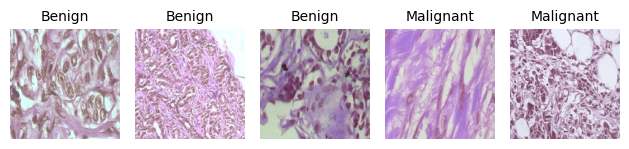

In [16]:
# Display the first 5 images from the training set along with their corresponding labels
for i in range(5):  
    plt.subplot(1, 5, i+1)  
    plt.imshow(X_train_images[i])  
    plt.axis('off')  
    plt.title(y_train_binary[i], fontsize=10)  

plt.tight_layout() 
plt.show()

In [17]:
# Map the categorical labels (Benign, Malignant) to numeric values (0, 1)
label_mapping = {'Benign': 0, 'Malignant': 1}

# Convert the training, validation, and test labels to numeric format
y_train_binary = np.array([label_mapping[label] for label in y_train_binary]) 
y_val_binary = np.array([label_mapping[label] for label in y_val_binary])  
y_test_binary = np.array([label_mapping[label] for label in y_test_binary])  


In [18]:
# Check the transformed y_train_binary labels
y_train_binary

array([0, 0, 0, ..., 1, 1, 1])

# Model Experimentation and Tuning
In this section, we will first test a small and simple model, and then move on to a larger and more complex model. This approach allows us to compare the performance of both extremes and determine the best starting point for a good model architecture.

In [ ]:
# Initialize the Sequential model
model = Sequential()

# Add a convolutional layer followed by max pooling
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

# Add another convolutional layer followed by max pooling
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a dense layer 
model.add(Dense(64, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We define the EarlyStopping callback here, which will be used for all models moving forward.

In [26]:
# Define the EarlyStopping callback to save training time
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=4,  
    restore_best_weights=True)

In [ ]:
# Train the model 
history = model.fit(
    X_train_images,  
    y_train_binary,  
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,  
    batch_size=32,  
    verbose=1,  
    callbacks=[early_stopping]  
)

Epoch 1/30
159/159 [==============================] - 35s 207ms/step - loss: 0.5393 - accuracy: 0.7603 - val_loss: 0.4035 - val_accuracy: 0.8373
Epoch 2/30
159/159 [==============================] - 27s 167ms/step - loss: 0.4650 - accuracy: 0.8085 - val_loss: 0.3865 - val_accuracy: 0.8610
Epoch 3/30
159/159 [==============================] - 26s 163ms/step - loss: 0.4435 - accuracy: 0.8117 - val_loss: 0.4055 - val_accuracy: 0.8397
Epoch 4/30
159/159 [==============================] - 26s 163ms/step - loss: 0.4170 - accuracy: 0.8319 - val_loss: 0.4989 - val_accuracy: 0.7780
Epoch 5/30
159/159 [==============================] - 25s 158ms/step - loss: 0.4181 - accuracy: 0.8243 - val_loss: 0.3913 - val_accuracy: 0.8318
Epoch 6/30
159/159 [==============================] - 25s 159ms/step - loss: 0.3866 - accuracy: 0.8425 - val_loss: 0.3750 - val_accuracy: 0.8460
Epoch 7/30
159/159 [==============================] - 26s 161ms/step - loss: 0.3746 - accuracy: 0.8463 - val_loss: 0.3860 - val_ac

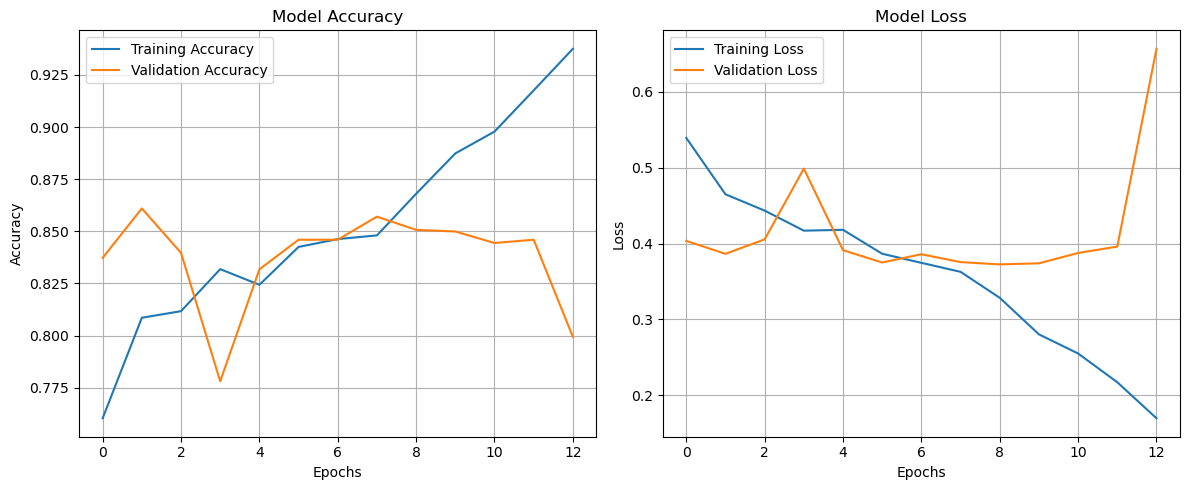

In [44]:
plot_training_history(history)

The results indicate that the training accuracy improves steadily over the epochs, while the validation accuracy fluctuates and eventually decreases, suggesting overfitting after a few epochs. Similarly, the training loss decreases consistently, but the validation loss starts increasing, further confirming that the model is failing to generalize effectively to the validation data.

Now, let's try with a larger model.

In [ ]:
# Define a larger model
model = Sequential()

# Add convolutional layers 
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3))) 
model.add(MaxPooling2D((2, 2)))  

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add fully connected dense layers with dropout
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4)) 

model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.2)) 

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'] 
)


In [ ]:
# Train the model
history = model.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
159/159 [==============================] - 223s 1s/step - loss: 0.6423 - accuracy: 0.7303 - val_loss: 0.5120 - val_accuracy: 0.6991
Epoch 2/30
159/159 [==============================] - 212s 1s/step - loss: 0.5069 - accuracy: 0.7777 - val_loss: 0.5100 - val_accuracy: 0.7780
Epoch 3/30
159/159 [==============================] - 212s 1s/step - loss: 0.4739 - accuracy: 0.8032 - val_loss: 0.4437 - val_accuracy: 0.8491
Epoch 4/30
159/159 [==============================] - 211s 1s/step - loss: 0.4710 - accuracy: 0.8032 - val_loss: 0.4288 - val_accuracy: 0.8302
Epoch 5/30
159/159 [==============================] - 206s 1s/step - loss: 0.4689 - accuracy: 0.8119 - val_loss: 0.4201 - val_accuracy: 0.8555
Epoch 6/30
159/159 [==============================] - 209s 1s/step - loss: 0.4599 - accuracy: 0.8133 - val_loss: 0.6563 - val_accuracy: 0.6959
Epoch 7/30
159/159 [==============================] - 209s 1s/step - loss: 0.4711 - accuracy: 0.8107 - val_loss: 0.4358 - val_accuracy: 0.8460

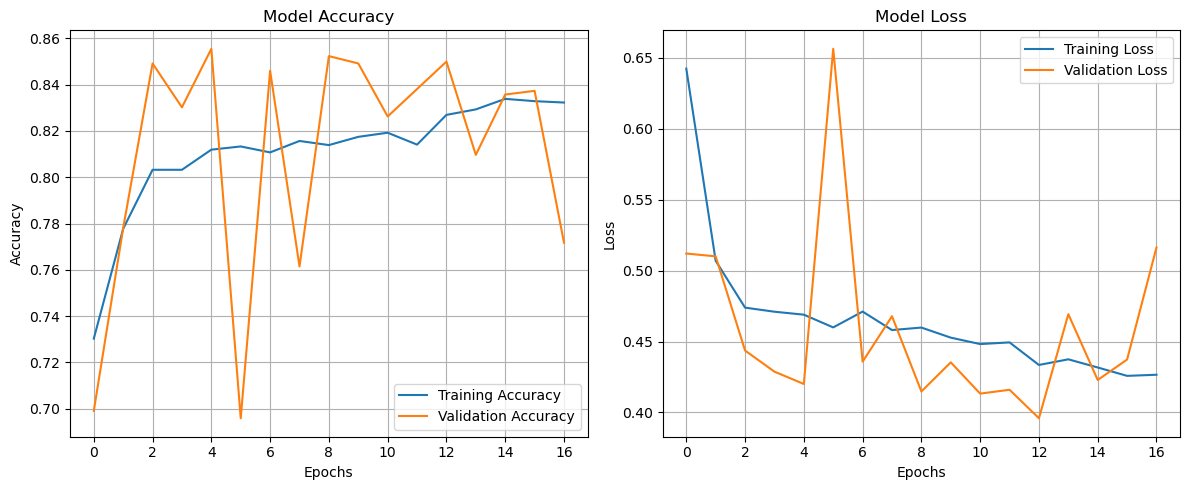

In [47]:
plot_training_history(history)

The larger model is capable of learning patterns in the training data, but the high variance in the validation performance suggests difficulty generalizing to unseen data.

We will now implement an intermediate model, positioned between the extremes we tested before. Additionally, we have adjusted the optimizer, using rmsprop instead of adam.

In [ ]:
# Initialize the model
model = Sequential()

# First convolutional
model.add(Conv2D(64, (2, 2), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

# Second convolutional
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))  

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.3)) 

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
159/159 [==============================] - 117s 722ms/step - loss: 0.6609 - accuracy: 0.7202 - val_loss: 0.4636 - val_accuracy: 0.8547
Epoch 2/30
159/159 [==============================] - 112s 706ms/step - loss: 0.5373 - accuracy: 0.7771 - val_loss: 0.4281 - val_accuracy: 0.8207
Epoch 3/30
159/159 [==============================] - 105s 660ms/step - loss: 0.5051 - accuracy: 0.7915 - val_loss: 0.4323 - val_accuracy: 0.8057
Epoch 4/30
159/159 [==============================] - 106s 665ms/step - loss: 0.4886 - accuracy: 0.8030 - val_loss: 0.6674 - val_accuracy: 0.6019
Epoch 5/30
159/159 [==============================] - 105s 658ms/step - loss: 0.4685 - accuracy: 0.8156 - val_loss: 0.5648 - val_accuracy: 0.7085
Epoch 6/30
159/159 [==============================] - 105s 658ms/step - loss: 0.4504 - accuracy: 0.8257 - val_loss: 1.0224 - val_accuracy: 0.5355


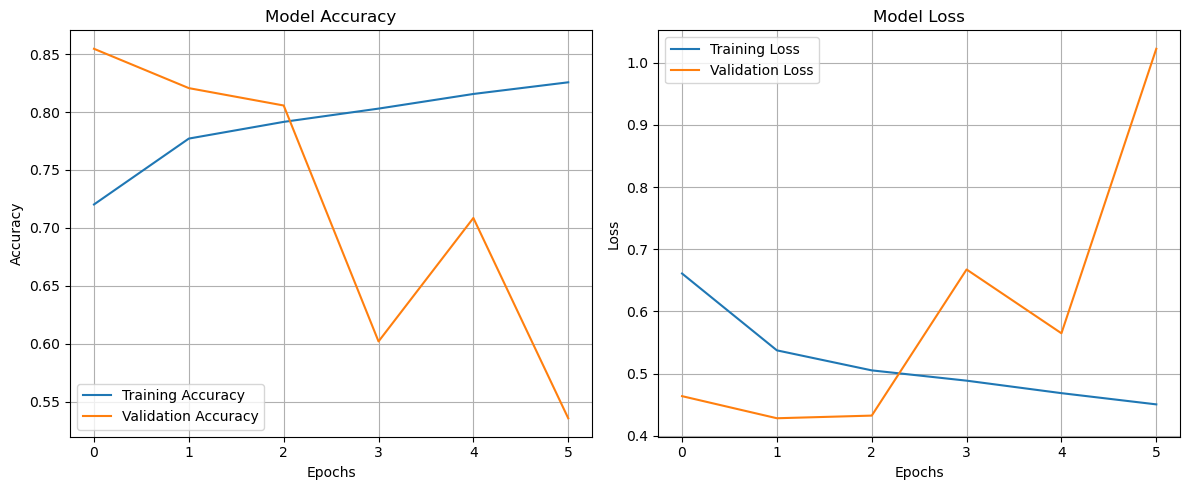

In [16]:
plot_training_history(history)

Let's experiment with changing the kernel size and adding more complexity to the model. Additionally, we will add dropout in the convolutional layers to prevent overfitting.

In [ ]:
# Initialize the model
model1 = Sequential()

# Convolutional layers with max pooling and dropout
model1.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.1))

model1.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model1.add(Flatten())

# Fully connected layers with dropout
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))

# Output layer
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model1.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
159/159 [==============================] - 151s 914ms/step - loss: 0.5992 - accuracy: 0.7151 - val_loss: 0.5295 - val_accuracy: 0.7117
Epoch 2/30
159/159 [==============================] - 129s 813ms/step - loss: 0.5209 - accuracy: 0.7631 - val_loss: 1.2770 - val_accuracy: 0.3878
Epoch 3/30
159/159 [==============================] - 129s 812ms/step - loss: 0.4989 - accuracy: 0.7838 - val_loss: 0.5314 - val_accuracy: 0.8373
Epoch 4/30
159/159 [==============================] - 161s 1s/step - loss: 0.4933 - accuracy: 0.7898 - val_loss: 0.3953 - val_accuracy: 0.8491
Epoch 5/30
159/159 [==============================] - 174s 1s/step - loss: 0.4877 - accuracy: 0.7953 - val_loss: 0.3966 - val_accuracy: 0.8357
Epoch 6/30
159/159 [==============================] - 162s 1s/step - loss: 0.4696 - accuracy: 0.8074 - val_loss: 0.5319 - val_accuracy: 0.7077
Epoch 7/30
159/159 [==============================] - 174s 1s/step - loss: 0.4547 - accuracy: 0.8135 - val_loss: 0.5055 - val_accurac

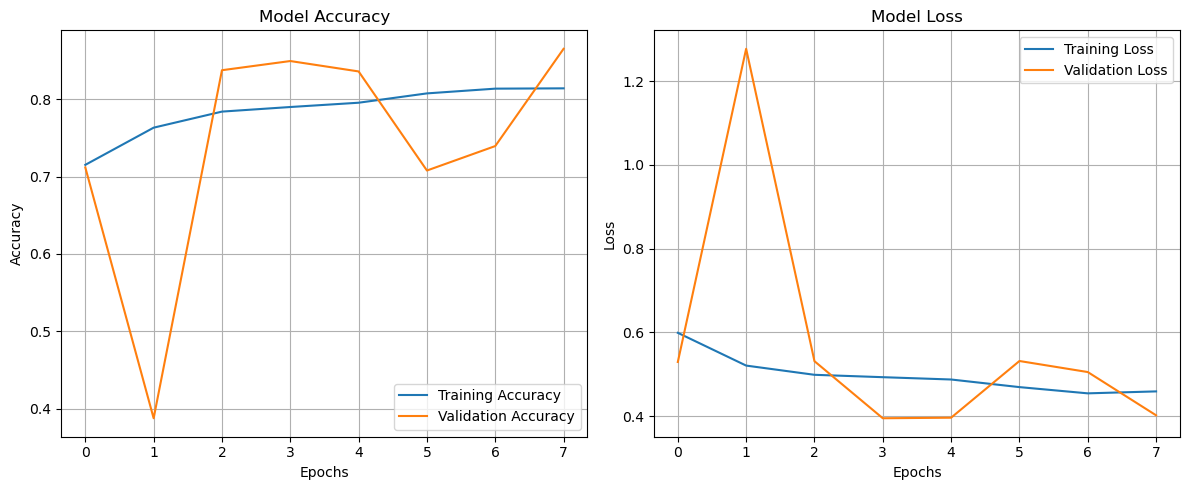

In [15]:
plot_training_history(history)

In [ ]:
# Save model 
model1.save('saved_models/model1.h5')

Although the result is still poor, it outperforms the previous one.
Now lets try image data generator with this model architecture.

# Data Augmentation

Data augmentation is a way to increase the size of the training dataset by making small changes to the existing data. This helps the model learn better by seeing more diverse examples.

In [ ]:
# ImageDataGenerator for augmenting training data
train_datagen = ImageDataGenerator(
    rotation_range=20,               
    width_shift_range=0.2,          
    height_shift_range=0.2,          
    shear_range=0.2,               
    zoom_range=0.2,               
    horizontal_flip=True             
)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train_images, y_train_binary, batch_size=32
)

val_generator = val_datagen.flow(
    X_val_images, y_val_binary, batch_size=32
)

# Define the model architecture
model_idg = Sequential()

model_idg.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model_idg.add(MaxPooling2D(pool_size=(2, 2)))
model_idg.add(Dropout(0.3))  

model_idg.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model_idg.add(MaxPooling2D(pool_size=(2, 2)))
model_idg.add(Dropout(0.1)) 

model_idg.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model_idg.add(MaxPooling2D(pool_size=(2, 2)))

model_idg.add(Flatten()) 

model_idg.add(Dense(128, activation='relu'))
model_idg.add(Dropout(0.4))  

model_idg.add(Dense(64, activation='relu'))
model_idg.add(Dropout(0.3))  

model_idg.add(Dense(1, activation='sigmoid'))

model_idg.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model_idg.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
159/159 [==============================] - 151s 925ms/step - loss: 0.6085 - accuracy: 0.7184 - val_loss: 0.4742 - val_accuracy: 0.8318
Epoch 2/30
159/159 [==============================] - 141s 890ms/step - loss: 0.5153 - accuracy: 0.7817 - val_loss: 0.4739 - val_accuracy: 0.7844
Epoch 3/30
159/159 [==============================] - 145s 910ms/step - loss: 0.4997 - accuracy: 0.7834 - val_loss: 0.5746 - val_accuracy: 0.6959
Epoch 4/30
159/159 [==============================] - 142s 890ms/step - loss: 0.4925 - accuracy: 0.7961 - val_loss: 0.5339 - val_accuracy: 0.6998
Epoch 5/30
159/159 [==============================] - 193s 1s/step - loss: 0.4813 - accuracy: 0.8020 - val_loss: 0.4275 - val_accuracy: 0.8649
Epoch 6/30
159/159 [==============================] - 177s 1s/step - loss: 0.4756 - accuracy: 0.8062 - val_loss: 0.6272 - val_accuracy: 0.7164
Epoch 7/30
159/159 [==============================] - 167s 1s/step - loss: 0.4853 - accuracy: 0.8016 - val_loss: 0.4704 - val_accu

In [ ]:
# Save the model
model_idg.save('saved_models/model_idg.h5')

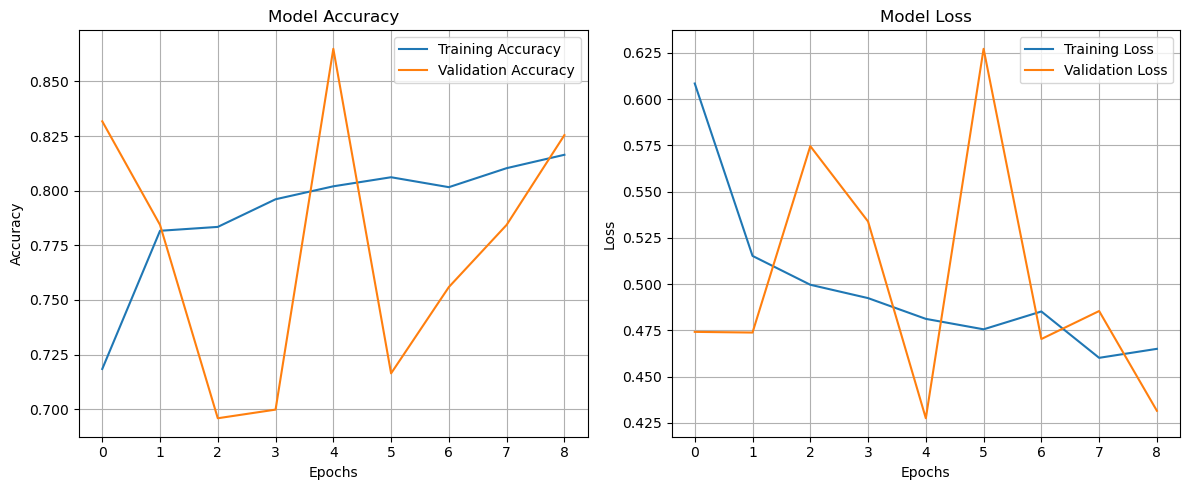

In [24]:
plot_training_history(history)

Now, let's try using a pre-trained model. We will choose three models that are less computationally expensive due to hardware limitations. For simplicity and to facilitate future tests for the multiclass problem, we will create a function to call and use these models.

# Pre-trained models

In [22]:
model_mobilenet = create_pretrained_model('MobileNetV2', input_shape=(150, 150, 3))
model_nasnetmobile = create_pretrained_model('NasNetMobile', input_shape=(150, 150, 3))
model_inceptionv3 = create_pretrained_model('InceptionV3', input_shape=(150, 150, 3))

In [ ]:
# Train MobileNetV2 model
history_mobilenet = model_mobilenet.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=300,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
17/17 [==============================] - 184s 9s/step - loss: 0.7775 - accuracy: 0.6720 - val_loss: 0.5977 - val_accuracy: 0.6904
Epoch 2/30
17/17 [==============================] - 135s 8s/step - loss: 0.5435 - accuracy: 0.7305 - val_loss: 0.4970 - val_accuracy: 0.7480
Epoch 3/30
17/17 [==============================] - 139s 8s/step - loss: 0.4956 - accuracy: 0.7568 - val_loss: 0.5049 - val_accuracy: 0.7314
Epoch 4/30
17/17 [==============================] - 138s 8s/step - loss: 0.4744 - accuracy: 0.7696 - val_loss: 0.4623 - val_accuracy: 0.7883
Epoch 5/30
17/17 [==============================] - 137s 8s/step - loss: 0.4540 - accuracy: 0.7862 - val_loss: 0.5221 - val_accuracy: 0.7243
Epoch 6/30
17/17 [==============================] - 134s 8s/step - loss: 0.4295 - accuracy: 0.7965 - val_loss: 0.4276 - val_accuracy: 0.7986
Epoch 7/30
17/17 [==============================] - 135s 8s/step - loss: 0.3976 - accuracy: 0.8214 - val_loss: 0.5083 - val_accuracy: 0.7330
Epoch 8/30
17

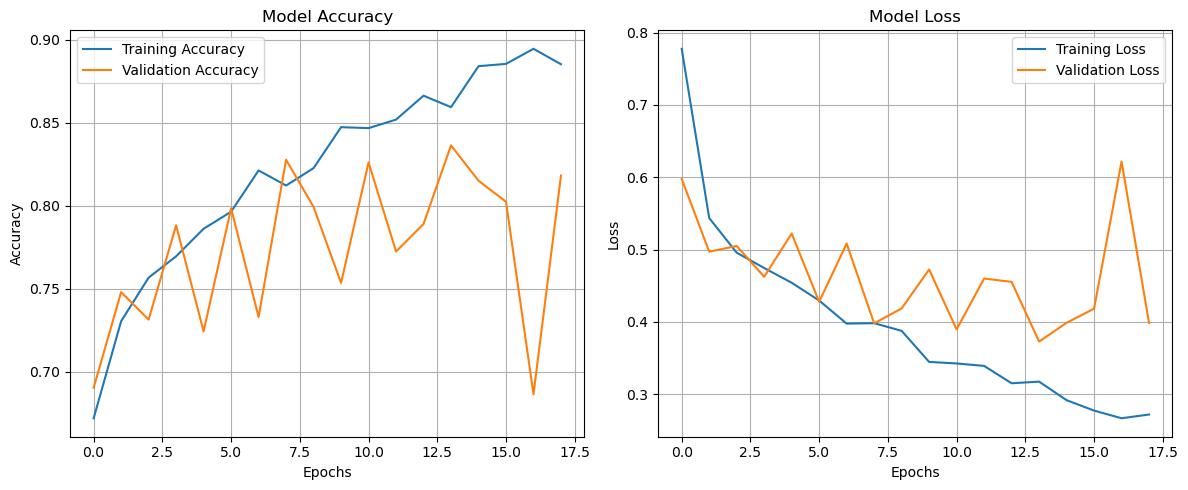

In [ ]:
plot_training_history(history_mobilenet)

In [23]:
# Train NasNetMobile model
history_nasnetmobile = model_nasnetmobile.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
159/159 [==============================] - 235s 1s/step - loss: 0.4976 - accuracy: 0.7609 - val_loss: 0.4240 - val_accuracy: 0.7867
Epoch 2/30
159/159 [==============================] - 227s 1s/step - loss: 0.4012 - accuracy: 0.8198 - val_loss: 0.3695 - val_accuracy: 0.8349
Epoch 3/30
159/159 [==============================] - 218s 1s/step - loss: 0.3555 - accuracy: 0.8437 - val_loss: 0.4901 - val_accuracy: 0.7899
Epoch 4/30
159/159 [==============================] - 241s 2s/step - loss: 0.3297 - accuracy: 0.8510 - val_loss: 0.3319 - val_accuracy: 0.8570
Epoch 5/30
159/159 [==============================] - 193s 1s/step - loss: 0.3008 - accuracy: 0.8720 - val_loss: 0.3704 - val_accuracy: 0.8357
Epoch 6/30
159/159 [==============================] - 193s 1s/step - loss: 0.2721 - accuracy: 0.8834 - val_loss: 0.4418 - val_accuracy: 0.7946
Epoch 7/30
159/159 [==============================] - 194s 1s/step - loss: 0.2519 - accuracy: 0.8984 - val_loss: 0.3159 - val_accuracy: 0.8705

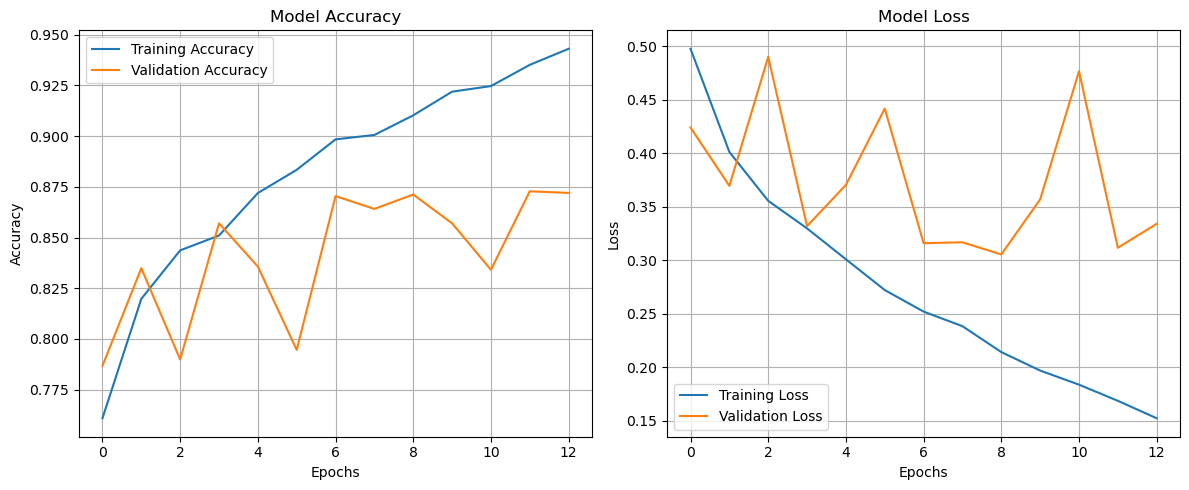

In [24]:
plot_training_history(history_nasnetmobile)

We will only save the NASNetMobile model, as it performed the best out of the three models during our initial run.

In [ ]:
# Save NasNetMobile model
model_nasnetmobile.save('saved_models/model_nasnetmobile_binary.h5')

In [ ]:
# Train InceptionV3 model
history_inceptionv3 = model_inceptionv3.fit(
    X_train_images,  
    y_train_binary,        
    validation_data=(X_val_images, y_val_binary),  
    epochs=30,       
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
159/159 [==============================] - 289s 2s/step - loss: 0.5785 - accuracy: 0.7459 - val_loss: 0.4624 - val_accuracy: 0.7875
Epoch 2/30
159/159 [==============================] - 270s 2s/step - loss: 0.4374 - accuracy: 0.7953 - val_loss: 0.4172 - val_accuracy: 0.8310
Epoch 3/30
159/159 [==============================] - 273s 2s/step - loss: 0.4044 - accuracy: 0.8206 - val_loss: 0.3833 - val_accuracy: 0.8231
Epoch 4/30
159/159 [==============================] - 273s 2s/step - loss: 0.3648 - accuracy: 0.8358 - val_loss: 0.3474 - val_accuracy: 0.8491
Epoch 5/30
159/159 [==============================] - 271s 2s/step - loss: 0.3447 - accuracy: 0.8453 - val_loss: 0.4019 - val_accuracy: 0.8152
Epoch 6/30
159/159 [==============================] - 272s 2s/step - loss: 0.3231 - accuracy: 0.8556 - val_loss: 0.3844 - val_accuracy: 0.8310
Epoch 7/30
159/159 [==============================] - 271s 2s/step - loss: 0.2976 - accuracy: 0.8722 - val_loss: 0.3937 - val_accuracy: 0.8452

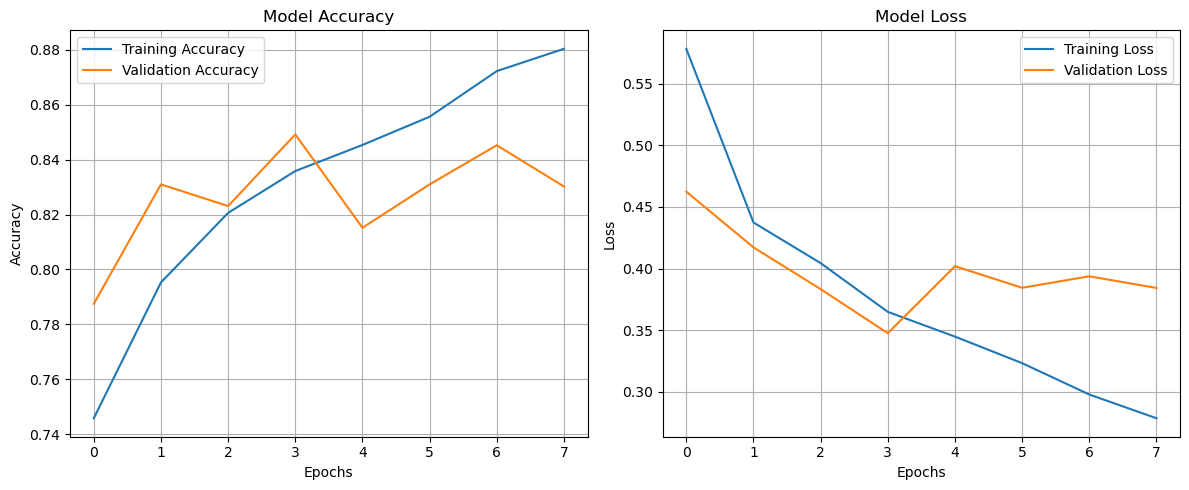

In [ ]:
plot_training_history(history_inceptionv3)

# Undersampling

In this part of the code, we are balancing the training dataset to address class imbalance. The training data originally had more malignant samples than benign ones. To ensure that the model trains on an equal number of both classes, we perform undersampling. By doing so, we aim to mitigate the bias that may arise from an imbalanced dataset. However, it is important to note that this approach can be considered naïve.

In [ ]:
# Define the number of samples for malignant class (the same as benign class)
train_samples_per_class = 1587

# Get the indices of malignant and benign samples
train_malignant_indices = np.where(y_train_binary == 1)[0]
train_benign_indices = np.where(y_train_binary == 0)[0]

# Set a random seed for reproducibility
np.random.seed(42)

# Randomly select the same number of malignant and benign samples
train_malignant_subsampled = np.random.choice(train_malignant_indices, size=train_samples_per_class, replace=False)
train_benign_subsampled = np.random.choice(train_benign_indices, size=train_samples_per_class, replace=False)

# Combine the balanced indices from both classes
train_balanced_indices = np.concatenate([train_malignant_subsampled, train_benign_subsampled])

# Apply the balanced indices to the images and labels
X_train_images_balanced = np.array(X_train_images)[train_balanced_indices]
y_train_binary_balanced = np.array(y_train_binary)[train_balanced_indices]

# Shuffle the balanced dataset
train_shuffled_indices = np.random.permutation(len(train_balanced_indices))
X_train_images_balanced = X_train_images_balanced[train_shuffled_indices]
y_train_binary_balanced = y_train_binary_balanced[train_shuffled_indices]

# Print the new class distribution
print("New classes balanced:")
print(f"Malignant (1): {np.sum(y_train_binary_balanced == 1)}")
print(f"Benign (0): {np.sum(y_train_binary_balanced == 0)}")


New classes balanced:
Malignant (1): 1587
Benign (0): 1587


In [25]:
# Define the same model architecture as model1
model_balanced = Sequential()

model_balanced.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model_balanced.add(MaxPooling2D(pool_size=(2, 2)))
model_balanced.add(Dropout(0.3))

model_balanced.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model_balanced.add(MaxPooling2D(pool_size=(2, 2)))
model_balanced.add(Dropout(0.1))

model_balanced.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model_balanced.add(MaxPooling2D(pool_size=(2, 2)))

model_balanced.add(Flatten())

model_balanced.add(Dense(128, activation='relu'))
model_balanced.add(Dropout(0.4))

model_balanced.add(Dense(64, activation='relu'))
model_balanced.add(Dropout(0.3))

model_balanced.add(Dense(1, activation='sigmoid'))

model_balanced.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Train with balanced training data
history = model_balanced.fit(
    X_train_images_balanced,  
    y_train_binary_balanced,        
    validation_data=(X_val_images, y_val_binary),
    epochs=30,
    batch_size=32,   
    verbose=1,
    callbacks=[early_stopping]        
)

Epoch 1/30
100/100 [==============================] - 97s 892ms/step - loss: 0.7366 - accuracy: 0.6424 - val_loss: 0.5519 - val_accuracy: 0.7504
Epoch 2/30
100/100 [==============================] - 77s 774ms/step - loss: 0.6055 - accuracy: 0.6843 - val_loss: 0.6163 - val_accuracy: 0.7551
Epoch 3/30
100/100 [==============================] - 75s 752ms/step - loss: 0.5665 - accuracy: 0.7401 - val_loss: 0.5365 - val_accuracy: 0.8602
Epoch 4/30
100/100 [==============================] - 75s 748ms/step - loss: 0.5565 - accuracy: 0.7401 - val_loss: 0.8566 - val_accuracy: 0.5261
Epoch 5/30
100/100 [==============================] - 77s 769ms/step - loss: 0.5458 - accuracy: 0.7514 - val_loss: 0.5439 - val_accuracy: 0.7077
Epoch 6/30
100/100 [==============================] - 76s 759ms/step - loss: 0.5475 - accuracy: 0.7435 - val_loss: 0.4771 - val_accuracy: 0.8562
Epoch 7/30
100/100 [==============================] - 77s 764ms/step - loss: 0.5345 - accuracy: 0.7565 - val_loss: 0.4555 - val_ac

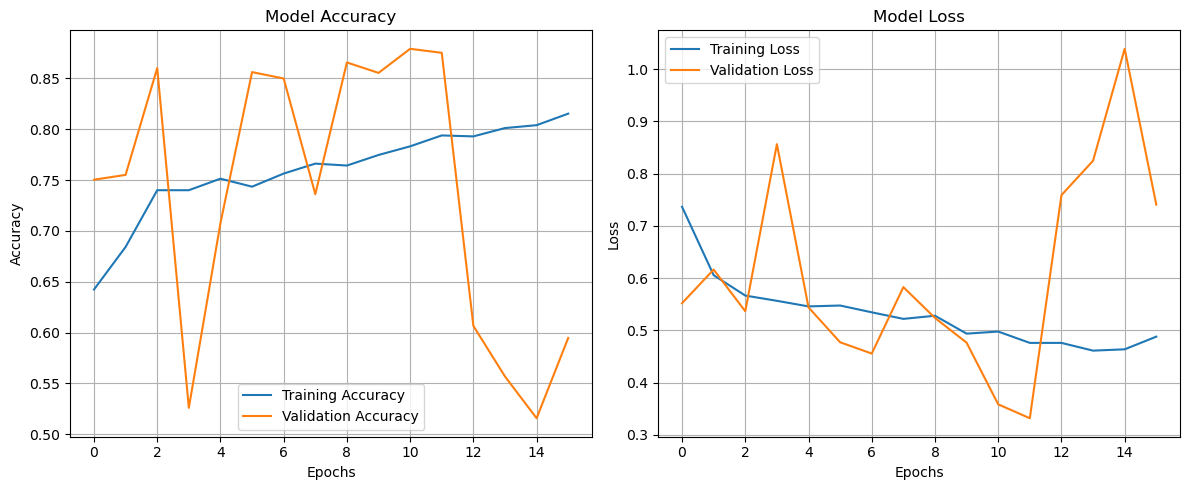

In [27]:
plot_training_history(history)

In [ ]:
model_balanced.save('saved_models/model_balanced.h5')  

Clearly, the result is not good, but this is mainly due to the batch size.
This issue occurs across all models. It was initially tested with a larger batch size at the beginning of the project, but this caused frequent crashes due to memory limitations. The RAM could not handle it, so a smaller batch size was chosen to avoid such issues. Additionally, attempts to run the models on Google Colab were unsuccessful, as we couldn't even import the images due to memory and time constraints.

# Evaluation of best 2 models

The models are not ideal, but they are the best we could achieve given the computational limitations. The results are influenced by several factors, including the class imbalance, the nature of the medical image problem, and the fact that achieving good results would require much higher values and more advanced models.

In [19]:
model1 = load_model('saved_models/model1.h5')

In [20]:
# Make predictions on the test set
y_pred1 = model1.predict(X_test_images)

# Convert the predictions to class labels based on the threshold
y_pred_classes1 = (y_pred1 > 0.5).astype(int)

# Print the classification report for Model 1
print("Classification Report for Model1:")
print(classification_report(y_test_binary, y_pred_classes1, target_names=['Benign', 'Malignant']))



50/50 [==============================] - 7s 141ms/step
Classification Report for Model1:
              precision    recall  f1-score   support

      Benign       0.86      0.58      0.69       496
   Malignant       0.83      0.96      0.89      1086

    accuracy                           0.84      1582
   macro avg       0.85      0.77      0.79      1582
weighted avg       0.84      0.84      0.83      1582



Given the imbalanced nature of the dataset, the F1-score is the key metric to assess model performance. For Malignant cases, the model performs well, with a high F1-score of 0.89, indicating that it successfully identifies most of the true positives. However, for Benign cases, the F1-score drops to 0.69, reflecting a lower ability to correctly classify these instances, likely due to the class imbalance.

The most critical issue, however, lies in the false negatives for Malignant cases. Missing a Malignant diagnosis is dangerous, as it can lead to untreated cancers. The high recall for Malignant cases (96%) helps mitigate this risk, but the model's performance for Benign cases should be improved to create a more balanced and reliable model.

In [12]:
model_nasnetmobile = load_model('saved_models\model_nasnetmobile_binary.h5')

In [28]:
# Make predictions on the test set using the NASNetMobile model
y_pred2 = model_nasnetmobile.predict(X_test_images)

# Convert the predictions to class labels based on the threshold
y_pred_classes2 = (y_pred2 > 0.5).astype(int)

# Print the classification report for NASNetMobile
print("Classification Report for NASNetMobile:")
print(classification_report(y_test_binary, y_pred_classes2, target_names=['Benign', 'Malignant']))


50/50 [==============================] - 59s 1s/step
Classification Report for NASNetMobile:
              precision    recall  f1-score   support

      Benign       0.83      0.77      0.80       496
   Malignant       0.90      0.93      0.91      1086

    accuracy                           0.88      1582
   macro avg       0.86      0.85      0.85      1582
weighted avg       0.88      0.88      0.88      1582



The NASNetMobile model performs significantly better than the previous one, especially in the context of this imbalanced dataset.

The F1-score for the malignant class is 0.91, which is crucial given the problem's nature. Since false negatives (failing to detect malignant cases) are the most critical error, the model's high recall of 0.93 ensures that most malignant cases are identified, minimizing the risk of missing them.
The F1-score for the benign class is 0.80, which shows a decent balance, though there’s still room for improvement in minimizing false positives.

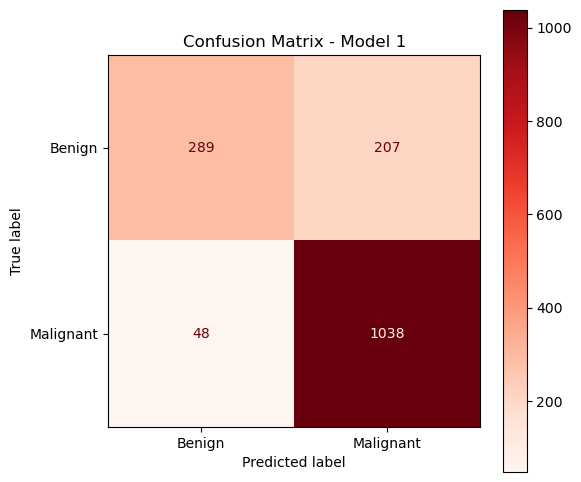

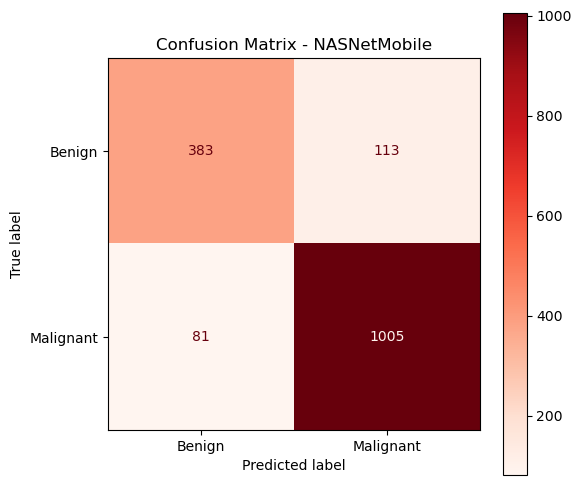

In [ ]:
# Compute confusion matrices for both models
cm1 = confusion_matrix(y_test_binary, y_pred_classes1)  # Model 1
cm2 = confusion_matrix(y_test_binary, y_pred_classes2)  # NASNetMobile

# Define class names for the confusion matrix plot
target_names = ['Benign', 'Malignant']

# Plot confusion matrix for Model 1
plot_confusion_matrix(cm1, target_names, title="Confusion Matrix - Model 1")

# Plot confusion matrix for NASNetMobile
plot_confusion_matrix(cm2, target_names, title="Confusion Matrix - NASNetMobile")
